In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize


Bad key "text.kerning_factor" on line 4 in
C:\Users\Usuario\anaconda3\envs\TF\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


# Part I: Linear Classification

## 3 ways to read the file 

In [2]:
#1. Using pd.read_csv
df = pd.read_csv('ex2data1.txt')
df
#note that in this file there isn't column's names, then we have to give a name and the first row
#is the column name

,34.62365962451697,78.0246928153624,0
0,30.286711,43.894998,0
1,35.847409,72.902198,0
2,60.182599,86.308552,1
3,79.032736,75.344376,1
4,45.083277,56.316372,0
...,...,...,...
94,83.489163,48.380286,1
95,42.261701,87.103851,1
96,99.315009,68.775409,1
97,55.340018,64.931938,1


In [3]:
#Writing a name to the columns
data = pd.read_csv('ex2data1.txt', names=['Exam 1', 'Exam 2', 'Admitted'])
data

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [4]:
#2. Using np.loadtxt and delimiter comma
data_loadtxt = np.loadtxt('ex2data1.txt', delimiter=',')
x_1 = data_loadtxt[:,0]
x_2 = data_loadtxt[:,1]
y_ad = data_loadtxt[:,2]

In [5]:
#3. Using open file and iterate over rows
file = open("ex2data1.txt", "r")
m = sum(1 for line in open('ex2data1.txt'))

col1 = np.zeros(m)
col2 = np.zeros(m)
col3 = np.zeros(m)
for i,line in enumerate(file):
    l = line.split(',')
    col1[i] = l[0]
    col2[i] = l[1]
    col3[i] = l[2]
col1

array([34.62365962, 30.28671077, 35.84740877, 60.18259939, 79.03273605,
       45.08327748, 61.10666454, 75.02474557, 76.0987867 , 84.43281996,
       95.86155507, 75.01365839, 82.30705337, 69.36458876, 39.53833914,
       53.97105215, 69.07014406, 67.94685548, 70.66150955, 76.97878373,
       67.37202755, 89.67677575, 50.53478829, 34.21206098, 77.92409145,
       62.27101367, 80.19018075, 93.1143888 , 61.83020602, 38.7858038 ,
       61.37928945, 85.40451939, 52.10797973, 52.04540477, 40.23689374,
       54.63510555, 33.91550011, 64.17698887, 74.78925296, 34.18364003,
       83.90239366, 51.54772027, 94.44336777, 82.36875376, 51.04775177,
       62.22267576, 77.19303493, 97.77159928, 62.0730638 , 91.5649745 ,
       79.94481794, 99.27252693, 90.54671411, 34.52451385, 50.28649612,
       49.58667722, 97.64563396, 32.57720017, 74.24869137, 71.79646206,
       75.39561147, 35.28611282, 56.2538175 , 30.05882245, 44.66826172,
       66.56089447, 40.45755098, 49.07256322, 80.27957401, 66.74

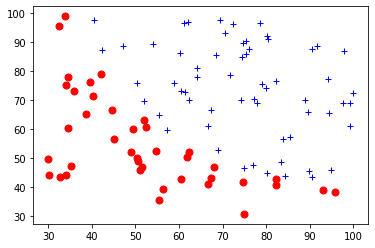

In [6]:
x1 = col1
x2 = col2
neg = np.where(col3 == 0)
pos = np.where(col3 == 1)
plt.plot(x1[neg], x2[neg],'ro', linewidth=2, markersize=7)
plt.plot(x1[pos], x2[pos],'b+')

In [7]:
def sigmoid(z):
    return 1/(1 +  np.exp(-z))
sigmoid(np.array([-10,0,10]))

array([4.53978687e-05, 5.00000000e-01, 9.99954602e-01])

(-0.1, 1.5)

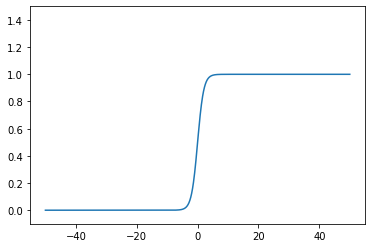

In [8]:
z = np.linspace(-50,50,1000)
plt.plot(z,sigmoid(z))
plt.yscale('linear')
plt.ylim(-0.1, 1.5)

In [9]:
def costFunction(theta,x_trainning,y_trainning):
    '''
        theta = [theta0, theta1,...,thetaN]
        x_trainnig = is a matrix of mx(n+1)
        y_trainnig = [y^(1),...,y^(m)]
        where N the number of features and m the training examples
    '''
    m = len(y_trainning)
#     suma = 0
#     for i in range(1,m):
#         suma+= y_trainning[i]*np.log(sigmoid(x_trainning@theta.T)[i]) + (1 - y_trainning[i])*np.log(1 - sigmoid(x_trainning@theta.T)[i])
#     return -(1/m)*suma
    return -(1/m)*(np.dot(y_trainning,np.log(sigmoid(x_trainning@theta.T))) + np.dot((1-y_trainning),np.log(1-sigmoid(x_trainning@theta.T))))

In [10]:
def derivativeCostFunction(theta,x_trainning,y_trainning):
    '''
        theta = [theta0, theta1,...,thetaN]
        x_trainnig = is a matrix of mx(n+1)
        y_trainnig = [y^(1),...,y^(m)]
        where N the number of features and m the training examples
    '''
    m = len(y_trainning)
    return (1/m)*np.dot(sigmoid(x_trainning@theta.T) - y_trainning, x_trainning)

In [11]:
#costFunction([0,0,0], [np.ones(1), x1, x2])
x_trainning = np.stack((np.ones(m), x1, x2), axis=1) #np.dstack((np.ones(m), x1, x2))
x_trainning


array([[ 1.        , 34.62365962, 78.02469282],
       [ 1.        , 30.28671077, 43.89499752],
       [ 1.        , 35.84740877, 72.90219803],
       [ 1.        , 60.18259939, 86.3085521 ],
       [ 1.        , 79.03273605, 75.34437644],
       [ 1.        , 45.08327748, 56.31637178],
       [ 1.        , 61.10666454, 96.51142588],
       [ 1.        , 75.02474557, 46.55401354],
       [ 1.        , 76.0987867 , 87.42056972],
       [ 1.        , 84.43281996, 43.53339331],
       [ 1.        , 95.86155507, 38.22527806],
       [ 1.        , 75.01365839, 30.60326323],
       [ 1.        , 82.30705337, 76.4819633 ],
       [ 1.        , 69.36458876, 97.71869196],
       [ 1.        , 39.53833914, 76.03681085],
       [ 1.        , 53.97105215, 89.20735014],
       [ 1.        , 69.07014406, 52.74046973],
       [ 1.        , 67.94685548, 46.67857411],
       [ 1.        , 70.66150955, 92.92713789],
       [ 1.        , 76.97878373, 47.57596365],
       [ 1.        , 67.37202755, 42.838

In [12]:
y_trainning = col3
y_trainning

array([0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

In [13]:
#Gradient descent
n_it = 0
error = 5
tol = 0.001
n_it_max = 10000
theta = np.array([-24,0.2,0.2]) #np.ones(n)
alpha = 0.001 #learning rate
while error > tol and n_it < n_it_max:
    #theta = theta - (alpha/m)*x_trainning.T@(sigmoid(x_trainning@theta.T) - y_trainning)
    theta = theta - alpha*derivativeCostFunction(theta,x_trainning,y_trainning)
    n_it += 1
    error = costFunction(theta,x_trainning,y_trainning)
    #print(n_it,error)
theta

array([-24.003753  ,   0.19697421,   0.19210381])

In [14]:
costFunction(np.array([-24.003753  ,   0.19697421,   0.19210381]),x_trainning,y_trainning)

0.20370515577517154

In [15]:
argmin = optimize.fmin(costFunction,np.array([-24,0.2,0.2]),args=(x_trainning,y_trainning,)) #BFGS, curve_fit, fmin
costFunction(argmin, x_trainning,y_trainning)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 100
         Function evaluations: 181


0.20349770159018551

In [16]:
def predict(theta,X):
    probability = sigmoid(X @ theta.T)
    predictions = np.zeros(probability.shape)
    for k,p in enumerate(probability):
        if p>= 0.5:
            predictions[k] = 1
        #else:
        #    predictions[k] = 0
    return predictions    

In [18]:
predictions = predict(theta, x_trainning)
corrects = 0
for i in range(m):
    if y_trainning[i] == predictions[i]:
        corrects += 1
accuracy = corrects / m
print(f'Accuracy = {100*accuracy}%')

Accuracy = 89.0%


Text(0.5, 1.0, 'Logistic Classification')

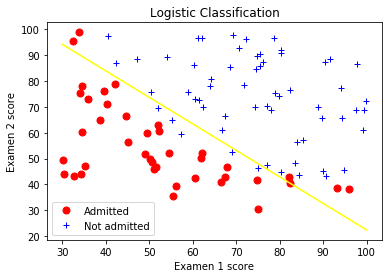

In [19]:
plt.plot(x1[neg], x2[neg],'ro', linewidth=2, markersize=7)
plt.plot(x1[pos], x2[pos],'b+')
plt.plot(np.linspace(30,100,1000), (-theta[0]/theta[2]) - (theta[1]/theta[2])*np.linspace(30,100,1000), color='yellow')
plt.xlabel('Examen 1 score')
plt.ylabel('Examen 2 score')
plt.legend(['Admitted', 'Not admitted'])
plt.title('Logistic Classification')

# Part II: Non-Linear Classification and Regularization

In [20]:
#using pandas

# QA = pd.read_csv('ex2data2.txt', names=['Test 1', 'Test 2', 'Result'])
# QA.head()

# x1 = np.asarray(QA['Test 1'])
# x2 = np.asarray(QA['Test 2'])
# y = np.asarray(QA['Result'])

# pos = np.where(y==1)
# neg = np.where(y==0)

# x1 = QA['Test 1']
# x2 = QA['Test 2']
# y = QA['Result']

# pos = QA[y.isin([1])]
# neg = QA[y.isin([0])]

# plt.plot(pos['Test 1'],pos['Test 2'],'b+')
# plt.plot(neg['Test 1'],neg['Test 2'],'ro')

In [21]:
QA = np.loadtxt('ex2data2.txt', delimiter=',')
QA

array([[ 0.051267 ,  0.69956  ,  1.       ],
       [-0.092742 ,  0.68494  ,  1.       ],
       [-0.21371  ,  0.69225  ,  1.       ],
       [-0.375    ,  0.50219  ,  1.       ],
       [-0.51325  ,  0.46564  ,  1.       ],
       [-0.52477  ,  0.2098   ,  1.       ],
       [-0.39804  ,  0.034357 ,  1.       ],
       [-0.30588  , -0.19225  ,  1.       ],
       [ 0.016705 , -0.40424  ,  1.       ],
       [ 0.13191  , -0.51389  ,  1.       ],
       [ 0.38537  , -0.56506  ,  1.       ],
       [ 0.52938  , -0.5212   ,  1.       ],
       [ 0.63882  , -0.24342  ,  1.       ],
       [ 0.73675  , -0.18494  ,  1.       ],
       [ 0.54666  ,  0.48757  ,  1.       ],
       [ 0.322    ,  0.5826   ,  1.       ],
       [ 0.16647  ,  0.53874  ,  1.       ],
       [-0.046659 ,  0.81652  ,  1.       ],
       [-0.17339  ,  0.69956  ,  1.       ],
       [-0.47869  ,  0.63377  ,  1.       ],
       [-0.60541  ,  0.59722  ,  1.       ],
       [-0.62846  ,  0.33406  ,  1.       ],
       [-0

In [22]:
n = QA.shape[1] - 1
m = QA.shape[0]
x1 = QA[:,0]
x2 = QA[:,1]
x0 = np.zeros(m)

y = QA[:,2]

pos = np.where(y==1)
neg = np.where(y==0)

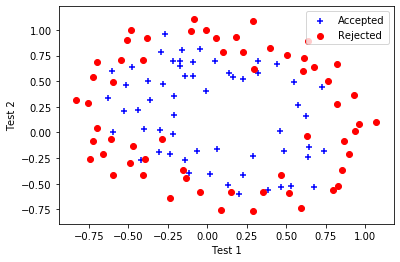

In [23]:
plt.scatter(x1[pos], x2[pos], marker = '+', color = 'blue')
plt.scatter(x1[neg], x2[neg], marker = 'o', color = 'red')
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.legend(['Accepted', 'Rejected'], loc='upper right')

In [24]:
def mapFeature(x1,x2,degree):
    N = 0
    for i in range(degree+1):
        for j in range(i+1):
            N+=1
    m = len(x1)
    M = np.ones([m,N])
    l=0
    for i in range(degree+1):
        for j in range(i+1):
            M[:,l] = (x1**(i-j)*(x2**j))
            l+=1
    return M

In [25]:
X = mapFeature(x1,x2,6)
N = X.shape[1]
N 

28

In [26]:
def costFunctionReg(theta, X, y, regulParameter):
    '''
        theta = [theta0, theta1,...,theta_n]
        x_trainnig = is a matrix of mx(n+1)
        y_trainnig = [y^(1),...,y^(m)]
        where n the number of features and m the training examples
    '''
    m = len(y)
    h_theta = sigmoid(X@theta.T)
    J = -(1/m)*(np.dot(y,np.log(h_theta)) + np.dot((1-y),np.log(1- h_theta))) +  (regulParameter/(2*m))*(np.linalg.norm(theta[1:])**2)
    return J


In [27]:
theta_initial = np.zeros(N)
costFunctionReg(theta_initial, X, y, 0.2)

0.6931471805599453

In [28]:
def derivativeCostFunctionReg(theta,X,y,regParameter):
    '''
        theta = [theta0, theta1,...,thetaN]
        x_trainnig = is a matrix of mxN
        y_trainnig = [y^(1),...,y^(m)]
        where N the number of features and m the training examples
    '''
    m = len(y)
    N = len(theta) 
    grad = np.zeros(N)
    h_theta = sigmoid(X@theta.T)
    error = h_theta - y
    
    grad[0] = (1/m)*np.dot(error, X[:,0])
    grad[1:] = (1/m)*np.dot(error, X[:,1:]) + (regParameter/m)*theta[1:]
    return grad

In [29]:
def mapFeaturePlot(x1k,x2k,degree):
    N=0
    for i in range(degree+1):
        for j in range(i+1):
            N+=1
    M = np.ones(N)
    l=0
    for i in range(degree+1):
        for j in range(i+1):
            M[l] = (x1k**(i-j)*(x2k**j))
            l+=1
    return M
mapFeaturePlot(x1[0], x2[0],6).shape

(28,)

### Gradient Descent

0.33058958773304437
0.3228271362738346
0.3188626244696099
0.31624485396574276
0.31426645638474554
0.3126515698431198
0.3112737586902541
0.3100667187826738
0.30899127842573937
0.308021868452111


Text(0.5, 1.0, 'Boundary decision with Gradient Descent: $\\lambda = 0$, $\\alpha = 0.2$')

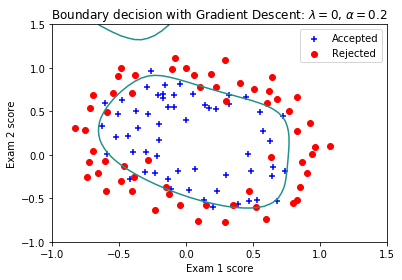

In [30]:
#lambda = 0
regulParameter = 0
n_it = 0
error = 5
tol = 0.001
n_it_max = 100000
theta = np.zeros(N)
alpha = 0.2 #learning rate
while error > tol and n_it < n_it_max:
    theta = theta - alpha*derivativeCostFunction(theta,X,y)
    n_it += 1
    error = costFunction(theta,X,y)
    if n_it % 10000 == 0:
        print(error)

u_vals = np.linspace(-1,1.5,50)
v_vals= np.linspace(-1,1.5,50)
z=np.zeros((len(u_vals),len(v_vals)))
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] = mapFeaturePlot(u_vals[i],v_vals[j],6) @ theta 
plt.scatter(x1[pos], x2[pos], marker = '+', color = 'blue')
plt.scatter(x1[neg], x2[neg], marker = 'o', color = 'red')
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.legend(['Accepted', 'Rejected'], loc='upper right')

plt.contour(u_vals, v_vals, z.T,0)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.title('Boundary decision with Gradient Descent: $\\lambda = 0$, $\\alpha = 0.2$')

0.5963451890409038
0.5627276511503208
0.5467842106426564
0.538686625419712
0.5344027428388969
0.532070108436535
0.5307719739012144
0.5300368779142507
0.5296144990260925
0.5293686831876744


Text(0.5, 1.0, 'Boundary decision with Gradient Descent: $\\lambda = 1$, $\\alpha = 0.2$')

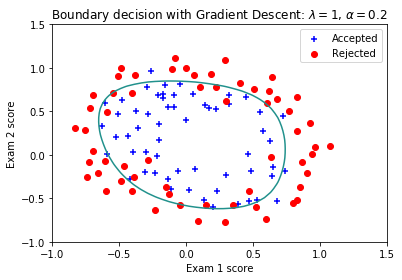

In [31]:
#lambda = 1
regulParameter = 1
n_it = 0
error = 5
tol = 0.001
n_it_max = 1000
theta = np.zeros(N)
alpha = 0.2 #learning rate
while error > tol and n_it < n_it_max:
    theta = theta - alpha*derivativeCostFunctionReg(theta,X,y,regulParameter)
    n_it += 1
    error = costFunctionReg(theta,X,y,regulParameter)
    if n_it % 100 == 0:
        print(error)

u_vals = np.linspace(-1,1.5,50)
v_vals= np.linspace(-1,1.5,50)
z=np.zeros((len(u_vals),len(v_vals)))
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] = mapFeaturePlot(u_vals[i],v_vals[j],6) @ theta 
plt.scatter(x1[pos], x2[pos], marker = '+', color = 'blue')
plt.scatter(x1[neg], x2[neg], marker = 'o', color = 'red')
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.legend(['Accepted', 'Rejected'], loc='upper right')

plt.contour(u_vals, v_vals, z.T,0)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.title('Boundary decision with Gradient Descent: $\\lambda = 1$, $\\alpha = 0.2$')

0.6864838510598474
0.6864838338742975
0.6864838338726167
0.6864838338726167
0.6864838338726167
0.6864838338726166
0.6864838338726167
0.6864838338726168
0.6864838338726168
0.6864838338726168


Text(0.5, 1.0, 'Boundary decision with Gradient Descent: $\\lambda = 100$, $\\alpha = 0.2$')

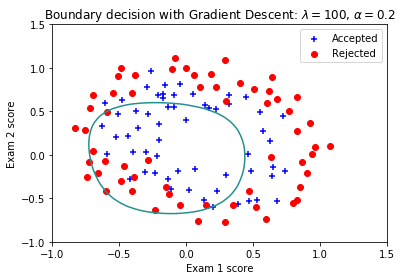

In [32]:
#lambda = 100
regulParameter = 100
n_it = 0
error = 5
tol = 0.001
n_it_max = 1000
theta = np.zeros(N)
alpha = 0.2 #learning rate
while error > tol and n_it < n_it_max:
    theta = theta - alpha*derivativeCostFunctionReg(theta,X,y,regulParameter)
    n_it += 1
    error = costFunctionReg(theta,X,y,regulParameter)
    if n_it % 100 == 0:
        print(error)

u_vals = np.linspace(-1,1.5,50)
v_vals= np.linspace(-1,1.5,50)
z=np.zeros((len(u_vals),len(v_vals)))
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] = mapFeaturePlot(u_vals[i],v_vals[j],6) @ theta 
plt.scatter(x1[pos], x2[pos], marker = '+', color = 'blue')
plt.scatter(x1[neg], x2[neg], marker = 'o', color = 'red')
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.legend(['Accepted', 'Rejected'], loc='upper right')

plt.contour(u_vals, v_vals, z.T,0)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.title('Boundary decision with Gradient Descent: $\\lambda = 100$, $\\alpha = 0.2$')

### optimize.fmin

Text(0.5, 1.0, 'Boundary decision with optimize.fmin: $\\lambda = 1$')

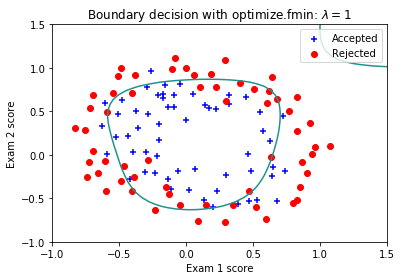

In [33]:
#lambda = 1
regulParameter = 1
argmin = optimize.fmin(costFunctionReg,np.zeros(N),args=(X,y,regulParameter),maxiter=10000) #BFGS, curve_fit, fmin

u_vals = np.linspace(-1,1.5,50)
v_vals= np.linspace(-1,1.5,50)
z=np.zeros((len(u_vals),len(v_vals)))
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] = mapFeaturePlot(u_vals[i],v_vals[j],6) @ argmin 
plt.scatter(x1[pos], x2[pos], marker = '+', color = 'blue')
plt.scatter(x1[neg], x2[neg], marker = 'o', color = 'red')
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.legend(['Accepted', 'Rejected'], loc='upper right')

plt.contour(u_vals, v_vals, z.T,0)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.title('Boundary decision with optimize.fmin: $\\lambda = 1$')

### optimize.fmin_tnc

Text(0.5, 1.0, 'Boundary decision with optimize.fmin_tnc: $\\lambda = 1$')

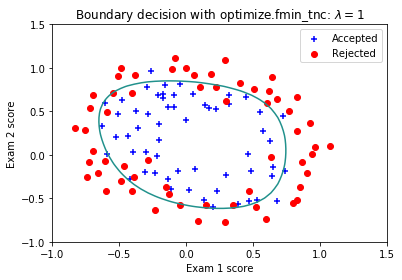

In [34]:
#lambda = 1
regulParameter = 1

theta_tnc,fneval,_ = optimize.fmin_tnc(func=costFunctionReg, x0=theta_initial, fprime=derivativeCostFunctionReg, args=(X, y, regulParameter))

u_vals = np.linspace(-1,1.5,50)
v_vals= np.linspace(-1,1.5,50)
z=np.zeros((len(u_vals),len(v_vals)))
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] = mapFeaturePlot(u_vals[i],v_vals[j],6) @ theta_tnc
plt.scatter(x1[pos], x2[pos], marker = '+', color = 'blue')
plt.scatter(x1[neg], x2[neg], marker = 'o', color = 'red')
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.legend(['Accepted', 'Rejected'], loc='upper right')

plt.contour(u_vals, v_vals, z.T,0)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.title('Boundary decision with optimize.fmin_tnc: $\\lambda = 1$')

### optimize.fmin_bfgs

         Current function value: 0.529003
         Iterations: 85
         Function evaluations: 88
         Gradient evaluations: 87


Text(0.5, 1.0, 'Boundary decision with fmin_bfgs: $\\lambda = 1$')

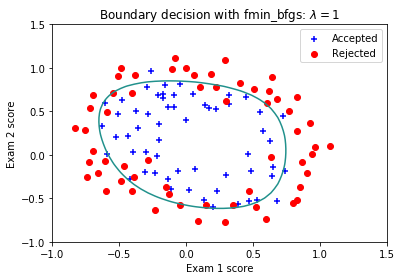

In [35]:
#lambda = 1
regulParameter = 1
theta_bfgs = optimize.fmin_bfgs(f=costFunctionReg, x0=np.ones(N), fprime=derivativeCostFunctionReg, args=(X, y, regulParameter),gtol=1e-20,maxiter=1000)

u_vals = np.linspace(-1,1.5,50)
v_vals= np.linspace(-1,1.5,50)
z=np.zeros((len(u_vals),len(v_vals)))
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] = mapFeaturePlot(u_vals[i],v_vals[j],6) @ theta_bfgs
plt.scatter(x1[pos], x2[pos], marker = '+', color = 'blue')
plt.scatter(x1[neg], x2[neg], marker = 'o', color = 'red')
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.legend(['Accepted', 'Rejected'], loc='upper right')

plt.contour(u_vals, v_vals, z.T,0)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.title('Boundary decision with fmin_bfgs: $\\lambda = 1$')

         Current function value: 0.529003
         Iterations: 37
         Function evaluations: 111
         Gradient evaluations: 110


Text(0.5, 1.0, 'Boundary decision with fmin_cg: $\\lambda = 1$')

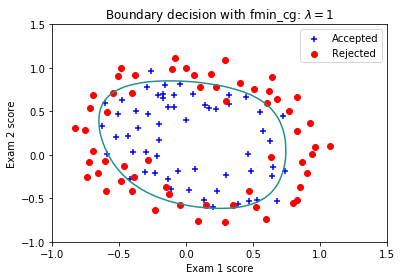

In [36]:
#lambda = 1
regulParameter = 1
theta_cg = optimize.fmin_cg(costFunctionReg, np.zeros(N), fprime=derivativeCostFunctionReg, args=(X, y, regulParameter),gtol=1e-20, maxiter=1000)

u_vals = np.linspace(-1,1.5,50)
v_vals= np.linspace(-1,1.5,50)
z=np.zeros((len(u_vals),len(v_vals)))
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] = mapFeaturePlot(u_vals[i],v_vals[j],6) @ theta_cg
plt.scatter(x1[pos], x2[pos], marker = '+', color = 'blue')
plt.scatter(x1[neg], x2[neg], marker = 'o', color = 'red')
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.legend(['Accepted', 'Rejected'], loc='upper right')

plt.contour(u_vals, v_vals, z.T,0)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.title('Boundary decision with fmin_cg: $\\lambda = 1$')

         Current function value: 0.271221
         Iterations: 1000
         Function evaluations: 3675
         Gradient evaluations: 3675


Text(0.5, 1.0, 'Boundary decision with fmin_cg: $\\lambda = 0$')

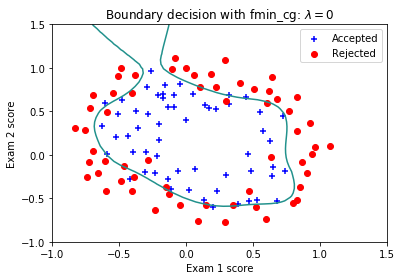

In [37]:
#lambda = 0
regulParameter = 0
theta_cg = optimize.fmin_cg(costFunction, np.zeros(N), fprime=derivativeCostFunction, args=(X, y),gtol=1e-20, maxiter=1000)

u_vals = np.linspace(-1,1.5,50)
v_vals= np.linspace(-1,1.5,50)
z=np.zeros((len(u_vals),len(v_vals)))
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] = mapFeaturePlot(u_vals[i],v_vals[j],6) @ theta_cg
plt.scatter(x1[pos], x2[pos], marker = '+', color = 'blue')
plt.scatter(x1[neg], x2[neg], marker = 'o', color = 'red')
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.legend(['Accepted', 'Rejected'], loc='upper right')

plt.contour(u_vals, v_vals, z.T,0)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.title('Boundary decision with fmin_cg: $\\lambda = 0$')

In [38]:
predictions = predict(theta, X)
corrects = 0
for i in range(m):
    if y[i] == predictions[i]:
        corrects += 1
accuracy = corrects / m
print(f'Accuracy = {100*accuracy}%')

Accuracy = 61.016949152542374%


In [40]:
from sklearn import linear_model

In [41]:
model = linear_model.LogisticRegression(penalty='l2', C=1.0)
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
model.score(X, y)

0.8305084745762712